# Linear Regression in Prediction Co2 Emissions of Vehicles

# 2. Multiple Linear Regression

## Objectives
*   Create a model, train it, test it and use the model to predict Co2 Emissions


 ### Assumptions of Multiple Linear Regression
 
1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable.

2. No Multicollinearity: None of the predictor variables are highly correlated with each other.

3. Independence: The observations are independent.

4. Homoscedasticity: The residuals have constant variance at every point in the linear model.

5. Multivariate Normality: The residuals of the model are normally distributed.

### Standard libraries to be imported


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Aylin1/Data-Science-Portfolio/47b37cbcb03136ae3c146803b62da2953f30b7e8/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## ***1. Data Exploration***

Let's first have a descriptive exploration on our data.


In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## Detection of Multicollinearity


Multicollinearity is a statistical phenomenon that occurs when two or more predictor variables in a regression model are highly correlated with each other, making it difficult to determine the individual effect of each variable on the response variable. There are two types of multicollinearity:

Structural multicollinearity: Structural multicollinearity occurs when two or more predictor variables in a regression model are linearly related, either theoretically or mathematically. For example, if we include both height and weight as predictor variables in a regression model, we can expect a high degree of correlation between them, as taller individuals tend to weigh more.

Data-driven multicollinearity: Data-driven multicollinearity occurs when two or more predictor variables in a regression model are highly correlated due to chance or sampling variability in the data. For example, if we collect data on height and weight from a sample of college students, we might find a high degree of correlation between these variables due to the fact that they are both related to age and lifestyle factors.

Both types of multicollinearity can cause problems in regression analysis, as they make it difficult to estimate the individual effect of each predictor variable on the response variable. Therefore, it is important to identify and address multicollinearity before interpreting the results of a regression analysis.

To visualize the multicollinearity, it is useful to plot the relationship between each pair of columns. 
This can be done by using seaborn.pairplot function.

To detect multicollinearity, one method is to calculate the Variance Inflation Factor (VIF). 

### Pairwise Plot of numeric columns

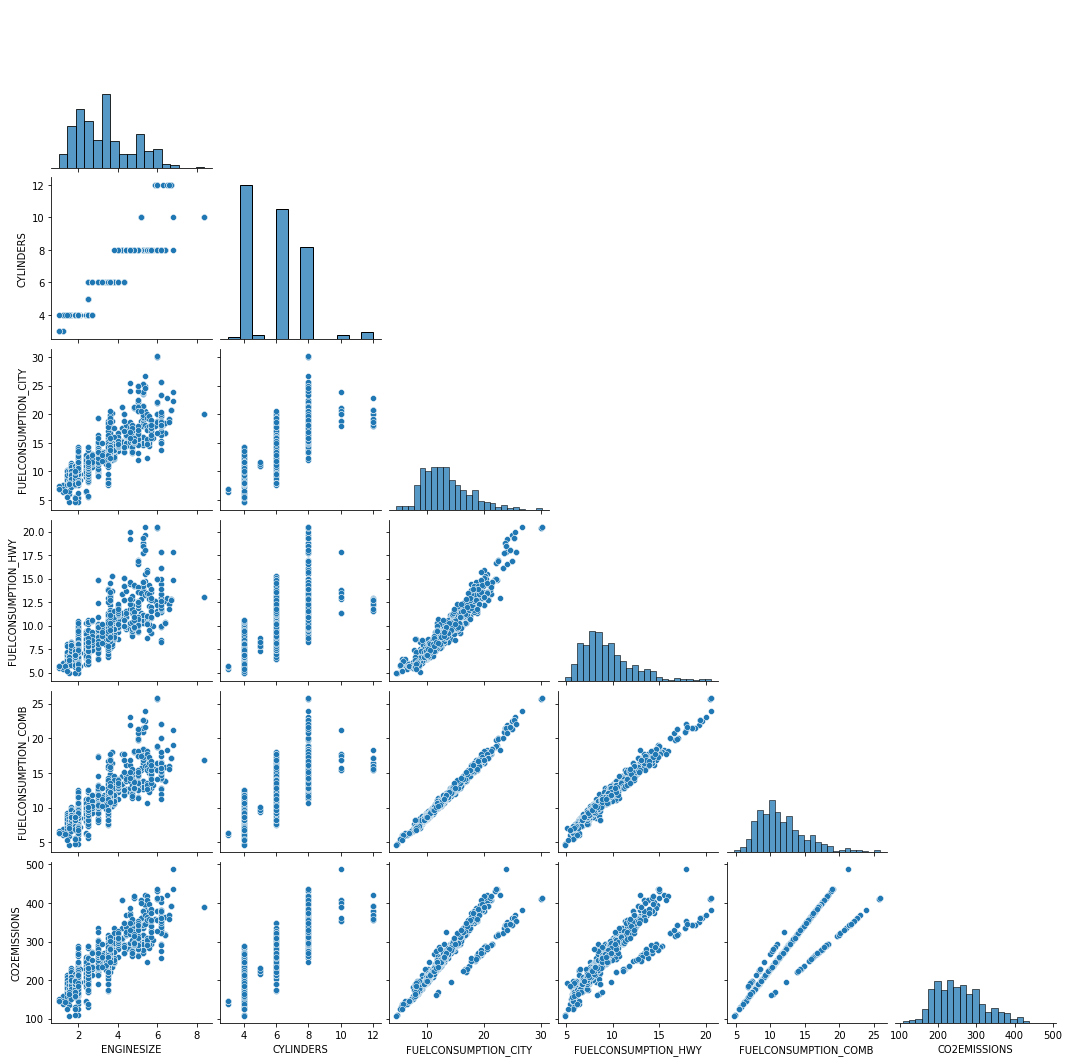

In [8]:
# plot the relationship between each pair of columns

sns.pairplot(cdf, corner=True)

### Correlation Heatmap

<AxesSubplot:>

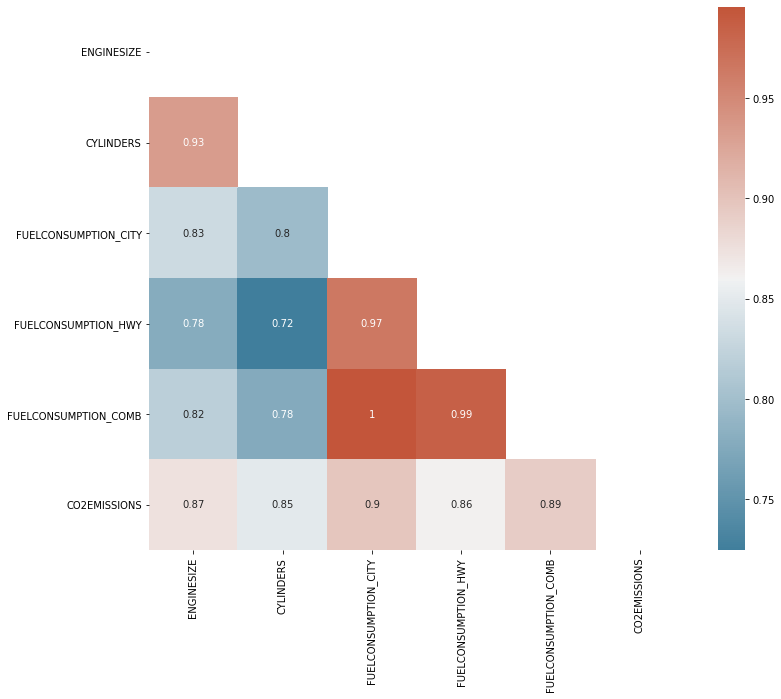

In [9]:
corr = cdf.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, ax=ax, mask = mask, cmap=cmap)


FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY and FUELCONSUMPTION_COMB are highly correlated to each other.

CYLINDERS and ENGINESIZE are also correlated with each other but with lower correlation coefficient comparing to ones between FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY and FUELCONSUMPTION_COMB.

In [10]:
df.corrwith(df.CO2EMISSIONS).sort_values()

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
MODELYEAR                        NaN
dtype: float64

When we look at the correlation between CO2 Emissions and independent numeric variables, all the variables show strong positive pearson's correlation coeef except FUELCONSUMPTION_COMB_MPG which has strong negative correlation.

### Detecting Multicollinearity by Calculating VIFs (Variance Inflation Factors)

VIFs are often used in regression analysis to detect multicollinearity, which is a situation where two or more independent variables in a regression model are highly correlated with each other. VIFs are preferred over pairwise correlations for several reasons:

VIFs take into account the effect of all other independent variables in the model on a given independent variable, while pairwise correlations only consider the relationship between two variables. This means that VIFs provide a more accurate measure of the degree of multicollinearity between a given independent variable and all other independent variables in the model.

Pairwise correlations can be misleading when there are multiple correlated independent variables in the model, as they do not take into account the joint effect of all these variables on the dependent variable. This can lead to overestimation or underestimation of the significance of individual independent variables.

VIFs are specifically designed to detect multicollinearity, while pairwise correlations do not provide a direct measure of multicollinearity.

VIFs can help identify the specific independent variables that are causing multicollinearity, allowing the researcher to take appropriate measures such as removing or transforming one of the variables.

In summary, VIFs are preferred over pairwise correlations for detecting multicollinearity because they provide a more accurate and comprehensive measure of the degree of multicollinearity between a given independent variable and all other

#### Interpretation of VIF

A VIF value of 1 indicates no correlation between the predictor variables, while a value greater than 1 indicates increasing levels of correlation between the predictor variables.

Typically, a VIF value greater than 5 or 10 indicates significant multicollinearity and suggests that the variable may need to be removed from the model. However, the threshold for an acceptable VIF value may vary depending on the context and specific research questions.

In summary, VIF provides information on the degree of multicollinearity in a regression model and helps to identify predictor variables that may need to be removed from the model to improve its accuracy and reliability.

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
x_temp = sm.add_constant(cdf.drop("CO2EMISSIONS", axis=1))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))


   VIF Factor              features
0        21.5                 const
1         9.5            ENGINESIZE
2         8.4             CYLINDERS
3      6203.3  FUELCONSUMPTION_CITY
4      1956.8   FUELCONSUMPTION_HWY
5     14813.3  FUELCONSUMPTION_COMB


As we expected, VIFs of FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY are extremely high due to multicollinearity since FUELCONSUMPTION_COMB is the combination of FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.

In [13]:
x_temp = sm.add_constant(cdf.drop(["CO2EMISSIONS","FUELCONSUMPTION_COMB"], axis=1))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))


   VIF Factor              features
0        21.4                 const
1         9.5            ENGINESIZE
2         8.4             CYLINDERS
3        21.1  FUELCONSUMPTION_CITY
4        16.3   FUELCONSUMPTION_HWY


When we exclude FUELCONSUMPTION_COMB from the regressor set, we still see that FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY have extremely high VIF values. 

In [14]:
x_temp = sm.add_constant(cdf.drop(["CO2EMISSIONS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"], axis=1))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))


   VIF Factor              features
0        19.8                 const
1         9.5            ENGINESIZE
2         7.9             CYLINDERS
3         3.1  FUELCONSUMPTION_COMB


When we exclude FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB, we see that VIFs decrease for CYLINDERS and and FUELCONSUMPTION_COMB it is even lower than 5. 

***In order to deal with the multicollinearity in our case, we will remove FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB, using FUELCONSUMPTION_COMB, CYLINDERS and ENGINESIZE as independent variables for multiple linear regression model***

## ***2. Creating train and test dataset***

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#Create training and test datasets
X = cdf.drop(["CO2EMISSIONS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"], axis=1)
Y = cdf["CO2EMISSIONS"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

## ***3. Modeling using the sm.OLS() function from the statsmodels library***

## Comparison of model statistics between combination of independent variables as regressors


In [64]:
# For calculating errors
from sklearn import metrics
from math import sqrt

In [65]:
def statsmodels_OLS(train_x, test_x, train_y, test_y):
    
    # Add a column for the constant
    train_x = sm.add_constant(train_x)

    # Fit the linear regression model using the training data
    model = sm.OLS(train_y, train_x).fit()

    # Add a column for the constant
    test_x= sm.add_constant(test_x)

    y_pred = model.predict(test_x)

    
    print("MSE: {}".format(metrics.mean_squared_error(test_y, y_pred)))
    print("RMSE: {}".format(sqrt(metrics.mean_squared_error(test_y, y_pred))))
    print("MAE: {}".format(metrics.mean_absolute_error(test_y, y_pred)))
    print("R-score: {}".format(model.rsquared))
    print("Adjusted R-score: {}".format(model.rsquared_adj))
    
    # np version
    # print("MSE: {}".format(np.square(np.subtract(test_y,y_pred)).mean()))
    # print("RMSE: {}".format(np.sqrt(np.square(np.subtract(test_y,y_pred)).mean())))
    
    return model


### ***model1 predictors : ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB***

In [66]:
model1 = statsmodels_OLS(X_train, X_test, Y_train, Y_test)

MSE: 522.1705884607351
RMSE: 22.8510522396833
MAE: 16.557259514352342
R-score: 0.8573344691061398
Adjusted R-score: 0.8568303506224159


In [67]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1701.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:42:58   Log-Likelihood:                -3903.0
No. Observations:                 853   AIC:                             7814.
Df Residuals:                     849   BIC:                             7833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.4960      3.700     17.971      0.000      59.234      73.758
ENGINESIZE              10.8681      1.752      6.202      0.000       7.429      14.307
CYLINDERS                7.3366      1.293      5.672      0.000       4.798       9.875
FUELCONSUMPTION_COMB     9.5568      0.403     23.743      0.000       8.767      10.347
==============================================================================
Omnibus:                       35.690   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.260
Skew:                          -0.374   Prob(JB):                     7.40e-12
Kurtosis:                       3.939   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***model2 predictors : CYLINDERS, FUELCONSUMPTION_COMB***

In [68]:
model2 = statsmodels_OLS(X_train[["CYLINDERS","FUELCONSUMPTION_COMB"]], X_test[["CYLINDERS","FUELCONSUMPTION_COMB"]], Y_train, Y_test)

MSE: 545.6789971391912
RMSE: 23.359773054102885
MAE: 17.21689074868941
R-score: 0.8508702187392205
Adjusted R-score: 0.850519325136254


In [69]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2425.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:43:06   Log-Likelihood:                -3921.9
No. Observations:                 853   AIC:                             7850.
Df Residuals:                     850   BIC:                             7864.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   52.6929      3.020     17.445      0.000      46.764      58.621
CYLINDERS               13.9750      0.742     18.831      0.000      12.518      15.432
FUELCONSUMPTION_COMB    10.5734      0.376     28.147      0.000       9.836      11.311
==============================================================================
Omnibus:                       34.919   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.683
Skew:                          -0.385   Prob(JB):                     4.42e-11
Kurtosis:                       3.865   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***model3 predictors : ENGINESIZE, FUELCONSUMPTION_COMB***

In [70]:
model3 = statsmodels_OLS(X_train[["ENGINESIZE","FUELCONSUMPTION_COMB"]], X_test[["ENGINESIZE","FUELCONSUMPTION_COMB"]], Y_train, Y_test)

MSE: 556.321505719373
RMSE: 23.58646869964584
MAE: 16.916020808875107
R-score: 0.8519282189496958
Adjusted R-score: 0.8515798147589893


In [71]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2445.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:43:12   Log-Likelihood:                -3918.8
No. Observations:                 853   AIC:                             7844.
Df Residuals:                     850   BIC:                             7858.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   79.7997      2.914     27.387      0.000      74.081      85.519
ENGINESIZE              19.0923      1.002     19.058      0.000      17.126      21.059
FUELCONSUMPTION_COMB     9.6907      0.409     23.686      0.000       8.888      10.494
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.733
Skew:                          -0.418   Prob(JB):                     1.07e-13
Kurtosis:                       3.991   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparison of model statistics between combination of independent variables as predictors

#### When we look at the summary of the models, we see that p-values of T-test for the variables used in all models are 0.00 meaning that slope parameters are not zero, each variable contributes to their model.

#### The P-value for the analysis of variance F-test suggests that all the models are more useful than the case of variables were not taken into account.

#### model1 in which CYLINDERS, ENGINESIZE, and FUELCONSUMPTION_COMB are used as predictors, gives higher Adjusted R2-score and lower MSE error comparing to models having ENGINESIZE & FUELCONSUMPTION_COMB or CYLINDERS & FUELCONSUMPTION_COMB as predictors.

#### We also see that model1 has lower AIC and BIC scores comparing to other models. AIC and BIC are commonly used for model evaluation and selection. These are an unbiased estimate of the model prediction error MSE. The lower these metrics, the better the model.


# 4. Modeling using linear model of sklearn library

**Coefficient** and **Intercept** in the simple linear regression are the parameters of the fit line.

Sklearn can estimate them directly from our data.

All of the data must be available to traverse and calculate the parameters.

In [25]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [59]:
def multiple_linear_model_sklearn(train_x, test_x, train_y, test_y):
    
    regr = LinearRegression(normalize=True)

    regr.fit(train_x, train_y)

    # Evaluate
    y_pred = regr.predict(test_x)
    
    r2 = r2_score(y_true=test_y, y_pred=y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(train_x) - 1) / ((len(train_x) - train_x.shape[1] - 1)))


    print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
    print("Mean absolute error: %.2f (MAE)" % np.mean(np.absolute(y_pred - test_y)))
    print("Adjusted R2-score: %.2f" % adj_r2)



### ***Predictors : ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB***

In [60]:
multiple_linear_model_sklearn(X_train, X_test, Y_train, Y_test)

Residual sum of squares (MSE): 522.17
Mean absolute error: 16.56 (MAE)
Adjusted R2-score: 0.88


### ***Predictors : CYLINDERS, FUELCONSUMPTION_COMB***

In [61]:
multiple_linear_model_sklearn(X_train[["CYLINDERS","FUELCONSUMPTION_COMB"]], X_test[["CYLINDERS","FUELCONSUMPTION_COMB"]], Y_train, Y_test)

Residual sum of squares (MSE): 545.68
Mean absolute error: 17.22 (MAE)
Adjusted R2-score: 0.88


### ***Predictors : ENGINESIZE, FUELCONSUMPTION_COMB***

In [40]:
multiple_linear_model_sklearn(X_train[["ENGINESIZE","FUELCONSUMPTION_COMB"]], X_test[["ENGINESIZE","FUELCONSUMPTION_COMB"]], Y_train, Y_test)

Residual sum of squares (MSE): 556.32
Mean absolute error: 16.92 (MAE)
Adjusted R2-score: 0.88


#### Again We see that model using CYLINDERS, ENGINESIZE, and FUELCONSUMPTION_COMB as regressors gives higher R2-score and lower MSE and MAE errors comparing to models using ENGINESIZE & FUELCONSUMPTION_COMB or CYLINDERS & FUELCONSUMPTION_COMB as regressors.